In [1]:
import numpy as np
import pandas as pd
import recombination as rb
import timeit

# Please, to run the experiment donwload the following dataset and put it in the /Datasets folder:
# 	- 3D_spatial_network.txt - 
#       https://archive.ics.uci.edu/ml/machine-learning-databases/00246/3D_spatial_network.txt

filename = "Datasets/3D_spatial_network.txt"
df = pd.read_csv(filename, sep=',', usecols=[1,2,3])
df = df.dropna()

print(list(df.columns.values) )

['9.3498486', '56.7408757', '17.0527715677876']


In [2]:
df.columns = ['Longitude', 'Latitude', 'Altitude']
print(list(df.columns.values))

df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')

df = df.dropna()

print(df.shape)
print(df.dtypes)

df.head()

['Longitude', 'Latitude', 'Altitude']
(434873, 3)
Longitude    float64
Latitude     float64
Altitude     float64
dtype: object


,Longitude,Latitude,Altitude
0,9.350188,56.740679,17.614840
1,9.350549,56.740544,18.083536
2,9.350806,56.740484,18.279465
3,9.351053,56.740486,18.422974
4,9.351475,56.740502,19.124889


In [3]:
x = df[['Longitude','Latitude']]
x = x.to_numpy()
y = df['Altitude']
y = y.to_numpy()
n = x.shape[1]

In [4]:
print(x.shape)
X = np.append(x,y[np.newaxis].T,1)

xy_sq = rb.tens_sq(X)

print(xy_sq.shape)
print(xy_sq[:,n+1:].shape)

N, d = xy_sq[:,n+1:].shape

(434873, 2)
(434873, 9)
(434873, 6)


In [5]:
mean_t = 0.

time_rand = []
iterations_rand = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_Mor_reset(
                    xy_sq[:,n+1:]-np.mean(xy_sq[:,n+1:],0), 400)

    time_rand.append((timeit.default_timer()-tic)*1000)
    iterations_rand.append(iterations)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_rand[-1]
    print("sample = ", i)
    print("time = ", time_rand[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_rand)
max_t = max(time_rand)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_rand))
print("---------------------------------------")

sample =  0
time =  25.89783199999829 ms
mean time =  25.89783199999829 ms
sample =  1
time =  24.778879999999504 ms
mean time =  25.338355999998896 ms
sample =  2
time =  21.507378999999105 ms
mean time =  24.06136366666563 ms
sample =  3
time =  84.63666600000153 ms
mean time =  39.205189249999606 ms
sample =  4
time =  20.866622000003332 ms
mean time =  35.53747580000035 ms
sample =  5
time =  154.406496 ms
mean time =  55.34897916666696 ms
sample =  6
time =  18.105339999998193 ms
mean time =  50.02845928571428 ms
sample =  7
time =  18.774430999997094 ms
mean time =  46.12170574999963 ms
sample =  8
time =  49.94199200000082 ms
mean time =  46.54618199999976 ms
sample =  9
time =  19.884173000001226 ms
mean time =  43.87998109999991 ms
sample =  10
time =  89.63156400000116 ms
mean time =  48.03921590909093 ms
sample =  11
time =  21.821433999999584 ms
mean time =  45.85440074999999 ms
sample =  12
time =  18.930951000001528 ms
mean time =  43.78336615384626 ms
sample =  13
time =

In [6]:
mean_t = 0.
sample = 100
time_MT = []

min_t = np.inf
max_t = 0.

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    x_cp = np.copy(xy_sq[:,n+1:])
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.Tchernychova_Lyons(
                    x_cp)
    time_MT.append((timeit.default_timer()-tic)*1000)

    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_MT[-1]
    print("sample = ", i)
    print("time = ", time_MT[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_MT)
max_t = max(time_MT)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std FC = ", np.std(time_MT))
print("---------------------------------------")

sample =  0
time =  91.4987649999972 ms
mean time =  91.4987649999972 ms


/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  1
time =  77.2909839999869 ms
mean time =  84.39487449999206 ms
sample =  2
time =  84.72879200000705 ms
mean time =  84.50618033333039 ms
sample =  3
time =  81.6435969999958 ms
mean time =  83.79053449999674 ms
sample =  4
time =  81.6444170000068 ms
mean time =  83.36131099999875 ms
sample =  5
time =  79.27543199998865 ms
mean time =  82.68033116666373 ms
sample =  6
time =  79.87032999999144 ms
mean time =  82.27890242856769 ms
sample =  7
time =  80.60644100000047 ms
mean time =  82.06984474999679 ms
sample =  8
time =  79.8697990000079 ms
mean time =  81.82539522222025 ms
sample =  9
time =  80.29677500000787 ms
mean time =  81.67253319999901 ms
sample =  10
time =  80.28569000001085 ms
mean time =  81.54645654545463 ms
sample =  11
time =  79.557180000009 ms
mean time =  81.38068350000083 ms
sample =  12
time =  80.52275500000405 ms
mean time =  81.31468900000108 ms
sample =  13
time =  80.17029599999148 ms
mean time =  81.23294664285754 ms
sample =  14
time =  79.884

In [7]:
from Maalouf_Jubran_Feldman import Fast_Caratheodory

time_FC = []
mean_t = 0.

for i in range(100):
    tic = timeit.default_timer()
    Fast_Caratheodory(xy_sq[:,n+1:],np.ones(N),d+1)
    time_FC.append((timeit.default_timer()-tic)*1000)
    mean_t += time_FC[-1]
    print("sample = ", i)
    print("time = ", time_FC[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")


print("---------------------------------------")
print("max FC = ", np.max(time_FC), " ms")
print("min FC = ", np.min(time_FC), " ms")   
print("mean FC = ", np.mean(time_FC), " ms")
print("std FC = ", np.std(time_FC))
print("---------------------------------------")

sample =  0
time =  110.81522400000665 ms
mean time =  110.81522400000665 ms
sample =  1
time =  98.48183400001176 ms
mean time =  104.6485290000092 ms
sample =  2
time =  99.29911100000766 ms
mean time =  102.86538966667536 ms
sample =  3
time =  105.8820200000099 ms
mean time =  103.61954725000899 ms
sample =  4
time =  97.43906399999958 ms
mean time =  102.38345060000711 ms
sample =  5
time =  98.94903800000066 ms
mean time =  101.81104850000604 ms
sample =  6
time =  103.008090000003 ms
mean time =  101.98205442857703 ms
sample =  7
time =  98.62367099999858 ms
mean time =  101.56225650000472 ms
sample =  8
time =  97.51222399999904 ms
mean time =  101.11225288889298 ms
sample =  9
time =  110.10365699999625 ms
mean time =  102.0113933000033 ms
sample =  10
time =  99.16972599999951 ms
mean time =  101.75305990909386 ms
sample =  11
time =  98.68601099999808 ms
mean time =  101.49747250000253 ms
sample =  12
time =  101.27786200000344 ms
mean time =  101.480579384618 ms
sample =  1

In [8]:
mean_t = 0.
sample = 1000

time_log = np.zeros(sample)

min_t = 0.
max_t = 0.

COV = np.matmul(x[:,:].T,x[:,:])/N

for i in range(sample):
    x_cp = np.copy(xy_sq[:,n+1:])

    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, _, _ = rb.recomb_log(x_cp)
    time_log[i] = (timeit.default_timer()-tic)*1000

    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1

    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED

    mean_t += time_log[i]
    print("sample = ", i)
    print("time = ", time_log[i], "ms")
    print("mean time = ", mean_t/(i+1), "ms")
    
mean_t = np.mean(time_log)
min_t = np.min(time_log)
max_t = np.max(time_log)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t, "ms")
print("---------------------------------------")

sample =  0
time =  42.211145999999644 ms
mean time =  42.211145999999644 ms
sample =  1
time =  27.567040999997516 ms
mean time =  34.88909349999858 ms
sample =  2
time =  28.116124999996828 ms
mean time =  32.63143733333133 ms
sample =  3
time =  38.21442699999977 ms
mean time =  34.02718474999844 ms
sample =  4
time =  31.91692800000112 ms
mean time =  33.60513339999898 ms
sample =  5
time =  27.15655699999786 ms
mean time =  32.530370666665455 ms
sample =  6
time =  33.11596099999292 ms
mean time =  32.61402642856938 ms
sample =  7
time =  27.522457000003442 ms
mean time =  31.97758024999864 ms
sample =  8
time =  27.919644000007793 ms
mean time =  31.5266984444441 ms
sample =  9
time =  28.166142000003447 ms
mean time =  31.190642800000035 ms
sample =  10
time =  28.859426000011013 ms
mean time =  30.978714000001034 ms
sample =  11
time =  27.488434000005668 ms
mean time =  30.68785733333475 ms
sample =  12
time =  27.77653699999405 ms
mean time =  30.463909615385468 ms
sample =  

In [9]:
time_rand = np.array(time_rand)
iterations_rand = np.array(iterations_rand)
time_FC = np.array(time_FC)
time_log = np.array(time_log)
time_MT = np.array(time_MT)

np.set_printoptions(precision=1)

print("Probability to be faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC))/sample*100, "%")
print("Probability to be 4x faster = ", 
            np.sum(np.array(time_rand)<np.mean(time_FC)/4)/sample*100, "%")

print("Standard deviation = ", np.std(time_rand))

print("The expected time of the log-random is ", np.mean(time_log), "ms")

print("Standard deviation of the log-random is  = ", np.std(time_log))

np.set_printoptions(precision=1)
print('''Some statistics for the randomized algorithm are: 
      average running time = ''', np.round(np.mean(time_rand),1),  
      "ms, min = " , np.round(np.min(time_rand),1), "ms, max = ", np.round(np.max(time_rand),1),
      "ms, std ", np.round(np.std(time_rand),1), 
      "ms. Using the log-random strategy they are: average running time = ", np.round(np.mean(time_log),1),
      "ms, min = ", np.round(np.min(time_log),1), "ms, max = ", np.round(np.max(time_log),1),
      ", std = ", np.round(np.std(time_log),1), "ms.",
      " Average runnig times of determinsitic: TL = ", np.round(np.mean(time_MT),1),
      "ms, MJF = ", np.round(np.mean(time_FC),1),"ms.")

Probability to be faster =  87.9 %
Probability to be 4x faster =  52.800000000000004 %
Standard deviation =  45.86657538207354
The expected time of the log-random is  30.492968790999797 ms
Standard deviation of the log-random is  =  4.0419062448033864
Some statistics for the randomized algorithm are: 
      average running time =  50.5 ms, min =  17.6 ms, max =  323.5 ms, std  45.9 ms. Using the log-random strategy they are: average running time =  30.5 ms, min =  25.2 ms, max =  87.1 , std =  4.0 ms.  Average runnig times of determinsitic: TL =  80.9 ms, MJF =  107.7 ms.


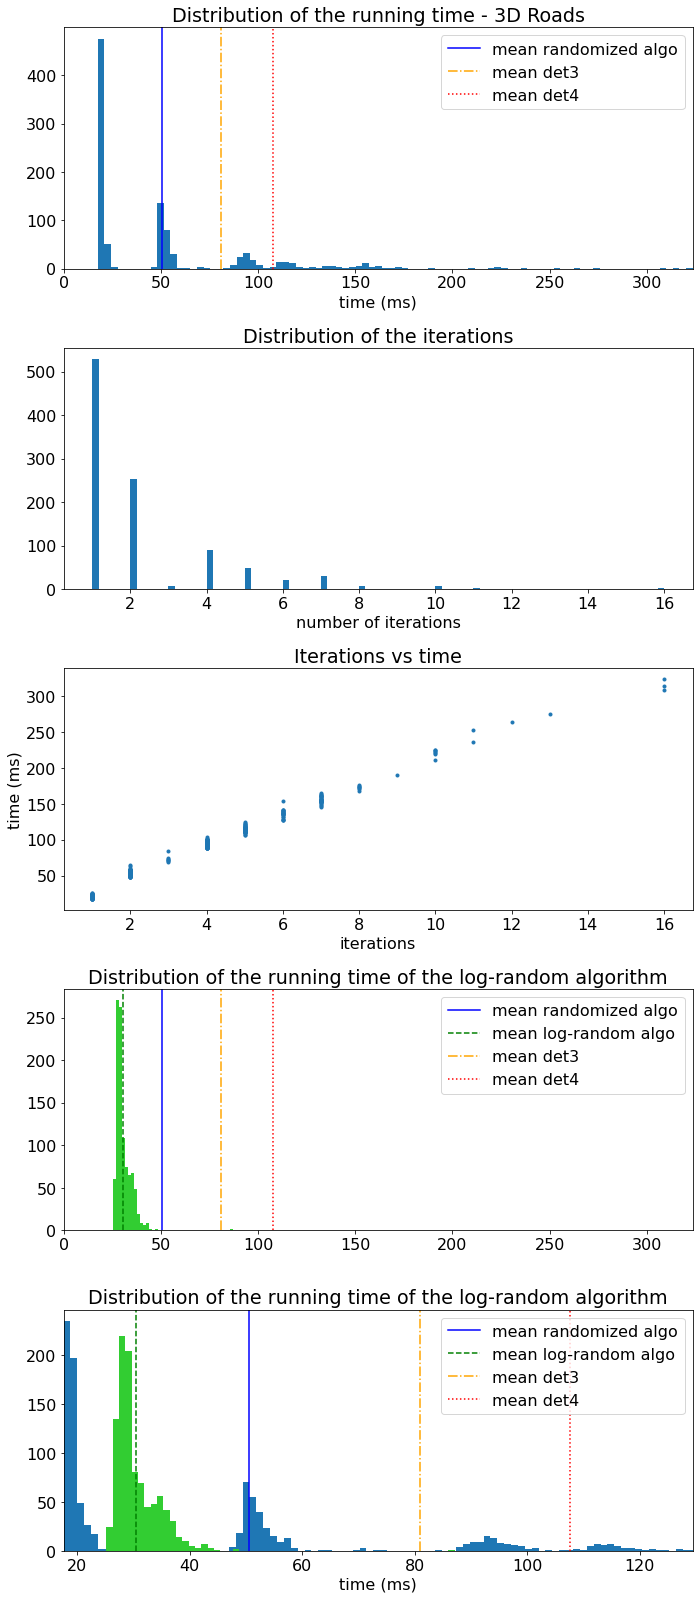

In [24]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(5,1,figsize=(10,4.5*5))

################################################
plt.subplot(5, 1, 1)

plt.hist(time_rand, bins=int(90))
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle=':', color="red", label="mean det4")

plt.xlim((0, max(time_rand)))

plt.legend()
plt.title('Distribution of the running time - 3D Roads')
plt.xlabel('time (ms)')

################################################
plt.subplot(5, 1, 2)

plt.hist(iterations_rand, bins=int(90))
plt.title('Distribution of the iterations')
plt.xlabel('number of iterations')
plt.xscale('linear')

################################################
plt.subplot(5, 1, 3)

plt.plot(iterations_rand,time_rand, '.')
plt.xlabel('iterations')
plt.ylabel('time (ms)')
plt.title('Iterations vs time')

################################################
plt.subplot(5, 1, 4)

plt.hist(time_log, bins=int(40),color='limegreen')
plt.axvline(np.mean(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle=':', color="red", label="mean det4")
plt.xlim((0, max(time_rand)))
plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')

################################################
plt.subplot(5, 1, 5)

plt.hist(time_rand, bins=int(250))
plt.hist(time_log, bins=int(55),color='limegreen')
plt.axvline(np.mean(time_rand), 0, max(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), 0, max(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), 0, max(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), 0, max(time_rand), linestyle=':', color="red", label="mean det4")
plt.xlim((min(time_rand), max(time_rand)/2.5))

plt.legend()
plt.title('Distribution of the running time of the log-random algorithm')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads.pdf')#, bbox_inches='tight')
plt.show()



In [11]:
mean_t = 0.

time_combined = []

min_t = np.inf
max_t = 0.
sample = 1000

COV = np.matmul(x.T,x)/N

for i in range(sample):
    
    tic = timeit.default_timer()
    w_star, idx_star, _, _, _, iterations, eliminated_points = rb.recomb_combined(
                    xy_sq[:,n+1:], 400)

    time_combined.append((timeit.default_timer()-tic)*1000)
    
    ################ CHECK THE BARYCENTER IS THE SAME
    COV_recomb = np.zeros(COV.shape)
    jj = 0 
    for j in idx_star:
        tmp = np.matmul(x[j,:][np.newaxis].T,x[j,:][np.newaxis])
        COV_recomb += tmp * w_star[jj]
        jj += 1
    
    assert np.allclose(COV_recomb,COV), "ERROR COV != COV_RECOMB"
    ################ CHECK FINISHED
    
    mean_t += time_combined[-1]
    print("sample = ", i)
    print("time = ", time_combined[-1], "ms")
    print("mean time = ", mean_t/(i+1), "ms")

    
min_t = min(time_combined)
max_t = max(time_combined)

print("---------------------------------------")
print("max t = ", max_t, "ms")
print("min t = ", min_t, "ms")
print("mean = ", mean_t/sample, "ms")
print("std = ", np.std(time_combined))
print("---------------------------------------")

sample =  0
time =  43.14140799999677 ms
mean time =  43.14140799999677 ms
sample =  1
time =  26.964609999993172 ms
mean time =  35.05300899999497 ms
sample =  2
time =  29.110366000026033 ms
mean time =  33.07212800000533 ms
sample =  3
time =  25.361682999999857 ms
mean time =  31.14451675000396 ms
sample =  4
time =  25.750762999990684 ms
mean time =  30.065766000001304 ms
sample =  5
time =  25.1478160000147 ms
mean time =  29.246107666670202 ms
sample =  6
time =  24.500619999997753 ms
mean time =  28.568180857145567 ms
sample =  7
time =  26.90619000000538 ms
mean time =  28.360432000003044 ms
sample =  8
time =  29.881117000002178 ms
mean time =  28.529397000002948 ms
sample =  9
time =  28.64658000001441 ms
mean time =  28.541115300004094 ms
sample =  10
time =  27.66406199998528 ms
mean time =  28.461383181820565 ms
sample =  11
time =  28.92637000002196 ms
mean time =  28.50013208333735 ms
sample =  12
time =  30.466525999997884 ms
mean time =  28.651393153849696 ms
sample =

/Users/fcosentino/OneDrive/__PhD Oxf ATI - CS/_Courses/_Recombination/_CODE Recombination/Official recomb/recombination.py:882: RuntimeWarning: invalid value encountered in true_divide
  alpha = mu/Phi[:,0]


sample =  84
time =  26.17029900000034 ms
mean time =  29.33201534117716 ms
sample =  85
time =  30.40967399999772 ms
mean time =  29.34454625581461 ms
sample =  86
time =  29.763694000024543 ms
mean time =  29.349364045977946 ms
sample =  87
time =  28.04661199999714 ms
mean time =  29.33456004545544 ms
sample =  88
time =  26.67074999999386 ms
mean time =  29.304629595506434 ms
sample =  89
time =  29.357418000017788 ms
mean time =  29.305216133334337 ms
sample =  90
time =  29.44242699999222 ms
mean time =  29.30672394505585 ms
sample =  91
time =  28.885661999993317 ms
mean time =  29.302147184783433 ms
sample =  92
time =  28.70796799999198 ms
mean time =  29.29575816129105 ms
sample =  93
time =  28.7963359999992 ms
mean time =  29.290445159575185 ms
sample =  94
time =  26.86841400000617 ms
mean time =  29.264950094737614 ms
sample =  95
time =  29.47791799999777 ms
mean time =  29.267168510417406 ms
sample =  96
time =  27.564912999991975 ms
mean time =  29.24961948453673 ms
sa

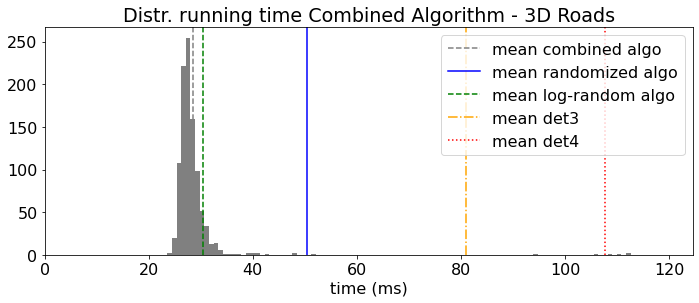

In [25]:
maximum = max(np.mean(time_rand),np.mean(time_log),np.mean(time_MT),np.mean(time_rand),np.mean(time_combined))*2

plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(figsize=(10,4.5))

plt.hist(time_combined,bins=int(100),color='grey')
plt.axvline(np.mean(time_combined), linestyle='--', color="grey", label="mean combined algo")
plt.axvline(np.mean(time_rand), linestyle='-', color="blue", label="mean randomized algo")
plt.axvline(np.mean(time_log), linestyle='--', color="green", label="mean log-random algo")
plt.axvline(np.mean(time_MT), linestyle='-.', color="orange", label="mean det3")
plt.axvline(np.mean(time_FC), linestyle=':', color="red", label="mean det4")
plt.xlim((0, maximum/1.3))

plt.legend()
plt.title('Distr. running time Combined Algorithm - 3D Roads')
plt.xlabel('time (ms)')

fig.tight_layout()
# plt.savefig('Distrib_running_time_3DRoads_combined.pdf')#, bbox_inches='tight')
plt.show()